### Build a prediction model for Salary_hike

#### Importing Libearies 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

C:\Users\Nakul Raje\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nakul Raje\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nakul Raje\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nakul Raje\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nakul Raje\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary inc

#### Importing Dataset 

In [2]:
data = pd.read_csv('F://Data_Set/Salary_dataset.csv') 

In [3]:
data.head() 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Check any Null value is Present in the Dataset or Not 

In [4]:
data.isnull().sum() 

YearsExperience    0
Salary             0
dtype: int64

Check any Outlier is Present in the Dataset 

Box Plot of YearsExperience Column 

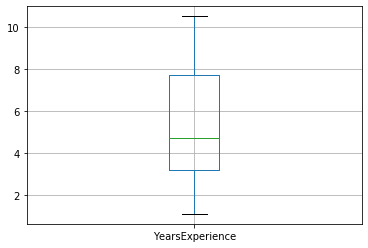

In [39]:
data.boxplot(column='YearsExperience') 

Box Plot of Ssalry Column 

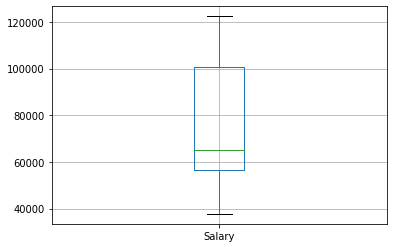

In [40]:
data.boxplot(column='Salary') 

Check Dataset Information 

In [41]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Correlation 

In [42]:
data.corr() 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [43]:
data.shape 

(30, 2)

### 1st Model Genration 

In [5]:
dataset_1 = data 

#### Visualization of Dataset using Dist Plot 

Visualization of YearsExperience Using Distplot

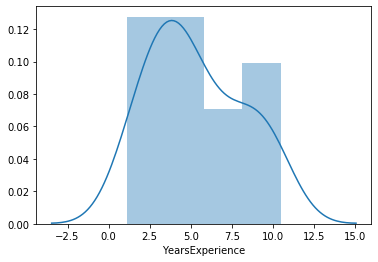

In [26]:
sns.distplot(dataset_1['YearsExperience']) 

Visualization of Ssalary Column Using Distplot 

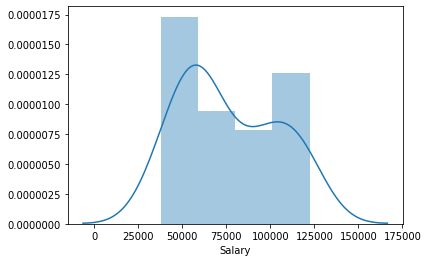

In [27]:
sns.distplot(dataset_1['Salary']) 

#### Fitting 1st Simple Linear Regression Model 

In [6]:
model_1 = smf.ols('YearsExperience~Salary',data=dataset_1).fit() 

Regression Plot 

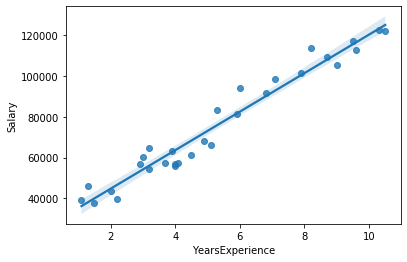

In [30]:
sns.regplot(x='YearsExperience',y='Salary',data=dataset_1) 

Test for Normality of Residuals (Q-Q Plot) of 1st Model

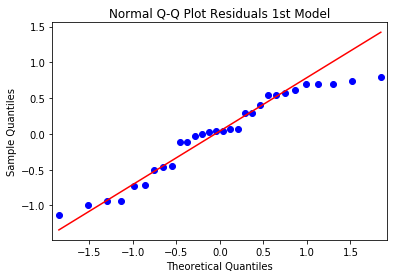

In [7]:
qqplot = sm.qqplot(model_1.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals 1st Model')
plt.show() 

Summary of 1st Model 

In [29]:
model_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.14e-20
Time:                        11:05:14   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Coefficent of 1st Model 

In [31]:
model_1.params 

Intercept   -2.383161
Salary       0.000101
dtype: float64

#### Predict New Data Points from 1st Model 

In [8]:
New_data = pd.Series([2.5,3.3,3.5,4,6.2]) 

In [9]:
New_data 

0    2.5
1    3.3
2    3.5
3    4.0
4    6.2
dtype: float64

In [10]:
data_pred = pd.DataFrame(New_data,columns=['YearsExperience']) 

In [11]:
data_pred 

,YearsExperience
0,2.5
1,3.3
2,3.5
3,4.0
4,6.2


Prediction fron 1st Model 

In [13]:
#y1_pred = model_1.predict(data_pred) 

### 2nd Model Genration by Using Log Transformation of the Data 

In [14]:
dataset_2 = data 

Log Transformation of the Data 

In [15]:
dataset_2['YearsExperience'] = np.log(dataset_2['YearsExperience']) 

dataset_2['Salary'] = np.log(dataset_2['Salary']) 

#### Visualization of Log Transformed Data Uing Dist Plot

Visualization of YearExperience Column  

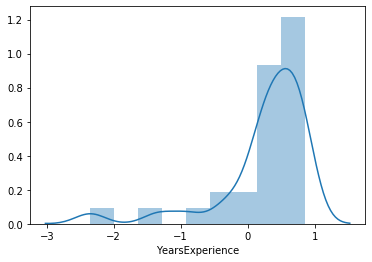

In [58]:
sns.distplot(dataset_2['YearsExperience']) 

Visualization of Salary Column 

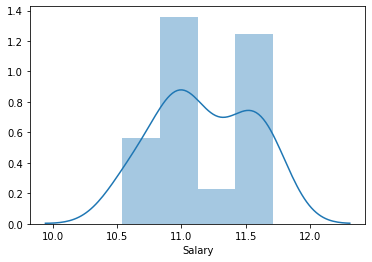

In [59]:
sns.distplot(dataset_2['Salary']) 

#### Fitting 2nd Simple Linear Regression Model 

In [16]:
model_2 = smf.ols('YearsExperience~Salary',data=dataset_2).fit() 

Test for Normality of Residuals (Q-Q Plot) of 2nd Model

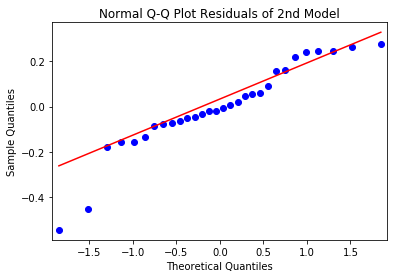

In [17]:
qqplot = sm.qqplot(model_2.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals of 2nd Model')
plt.show()

Summary of 2nd Model 

In [61]:
model_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     46.48
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           2.09e-07
Time:                        12:32:20   Log-Likelihood:                -16.961
No. Observations:                  30   AIC:                             37.92
Df Residuals:                      28   BIC:                             40.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.6590      2.482     -6.713      0.000     -21.743     -11.575
Salary         1.5134      0.222      6.818      0.000       1.059       1.968
==============================================================================
Omnibus:                       32.133   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.073
Skew:                          -2.283   Prob(JB):                     6.75e-18
Kurtosis:                       9.512   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3rd Model Genration by Using Normalization of the Data 

In [18]:
dataset_3 = data 

Normalization of Data 

In [19]:
from sklearn.preprocessing import Normalizer 

C:\Users\Nakul Raje\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nakul Raje\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [20]:
array_3 = dataset_3.values 

In [21]:
x3 = array_3[:,0:2] 

In [22]:
scaler3 = Normalizer().fit(x3)  

In [23]:
normalizedx3 = scaler3.transform(x3) 

In [24]:
data3 = pd.DataFrame(array_3,columns=['YearsExperience','Salary']) 

#### Visualization of Normalized Data Using Dist Plot 

Visualize the YearsExpernece Column 

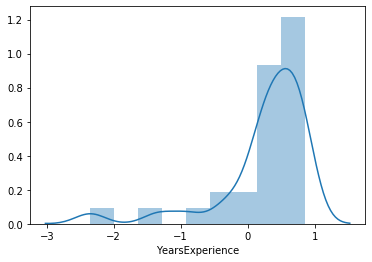

In [72]:
sns.distplot(data3['YearsExperience'])   

Visualization of Salary Column

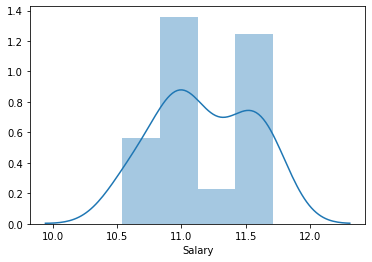

In [73]:
sns.distplot(data3['Salary']) 

#### Fitting 3rd Simple Linear Regression Model 

In [25]:
model_3 = smf.ols('YearsExperience~Salary',data=data3).fit() 

Test for Normality of Residuals (Q-Q Plot) of 3rd Model

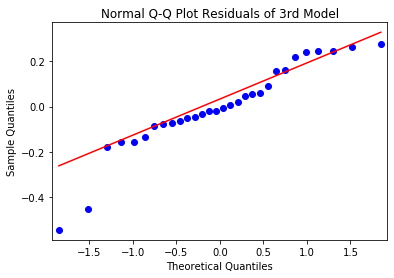

In [26]:
qqplot = sm.qqplot(model_3.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals of 3rd Model') 
plt.show() 

Summary of 3rd Model 

In [75]:
model_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     46.48
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           2.09e-07
Time:                        12:53:10   Log-Likelihood:                -16.961
No. Observations:                  30   AIC:                             37.92
Df Residuals:                      28   BIC:                             40.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.6590      2.482     -6.713      0.000     -21.743     -11.575
Salary         1.5134      0.222      6.818      0.000       1.059       1.968
==============================================================================
Omnibus:                       32.133   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.073
Skew:                          -2.283   Prob(JB):                     6.75e-18
Kurtosis:                       9.512   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""